<a href="https://colab.research.google.com/github/rahulvigneswaran/Basic-implementations-in-PyTorch/blob/master/gradient_descent.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
# Importing Libraries
from random import gauss
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [0]:
# Forward Pass
def forward(x, w):
  return x*w

# Loss function
def loss(x,y,w):
  y_pred = forward(x, w)
  return (y_pred - y)*(y_pred - y)

# Compute Gradient
def grad(w, x_val, y_val):
  return 2*(x_val)*(x_val*w - y_val)

In [0]:
# Dataset
x_data = np.random.randint(2, size=10)
y_data = np.random.randint(5, size=10)

In [0]:
# Initializing lists
loss_all = []
w_all = []

In [0]:
# Calculating loss for a range of weights "w"
for w in np.arange(0.0, 4.1, 0.1):
  l_sum = 0
  for x_val, y_val in zip(x_data, y_data):
    l = loss(x_val,y_val,w)
    l_sum += l
  loss_all.append(l_sum / len(x_data))  
  w_all.append(w)

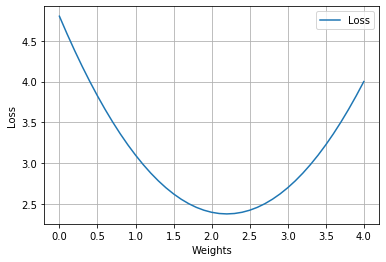

In [259]:
# Plotting weight vs loss
plt.plot(w_all,loss_all, label="Loss")
plt.xlabel("Weights")
plt.ylabel("Loss")
plt.grid("on")
plt.legend()
plt.show()

In [0]:
loss_all = []
w_all = []
step = []
accuracy_all = []

# Start with Random weight "w" selected from a Gaussian Distribution
w = gauss(0,10)

# Learning rate "a". Large values of "a" will cause overshooting of the optimizer.
a = 0.2

for i in range(10):
  l_sum = 0
  accuracy = 0
  for x_val, y_val in zip(x_data, y_data):
    l = loss(x_val,y_val,w)

    # Gradien Descent step
    w = w - a*grad(w, x_val, y_val)
    
    accuracy += abs((forward(x_val, w) - y_val))
    l_sum += l
  loss_all.append(l_sum / len(x_data))
  accuracy_all.append(100 - (accuracy / len(x_data)))  
  w_all.append(w)
  step.append(i)

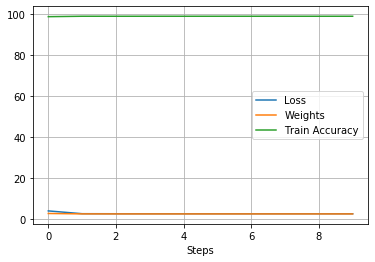

In [261]:
# Plotting steps vs loss vs weights
plt.plot(step, loss_all, label="Loss")
plt.plot(step, w_all, label="Weights")
plt.plot(step, accuracy_all, label="Train Accuracy")
plt.xlabel("Steps")
plt.grid("on")
plt.legend()
plt.show()

In [0]:
# Slightly more complex hypothesis --> y = (x^2)*(w_1) + (x)*(w_2) + b

# Forward Pass
def forward(x, w1, w2, b):
  return (x**2)*w1 + x*w2 + b

# Loss function
def loss(x, y, w1, w2, b):
  y_pred = forward(x, w1, w2, b)
  return (y_pred - y)*(y_pred - y)

# Compute Gradient
def grad(w1, w2, b, x, y):
  return 2*((x**2)*w1 + x*w2 + b - y)*((x**2) + x)

In [0]:
loss_all = []
w1_all = []
w2_all = []
step = []
accuracy_all = []

# Start with Random weight "w1","w2" and random bias "b" selected from a Gaussian Distribution
w1 = gauss(0,10)
w2 = gauss(0,10)
b = gauss(0,1)

# Learning rate "a". Large values of "a" will cause overshooting of the optimizer.
a = 0.2

for i in range(10):
  l_sum = 0
  accuracy = 0
  for x_val, y_val in zip(x_data, y_data):
    l = loss(x_val, y_val, w1, w2, b)

    # Gradien Descent step
    w1 = w1 - a*grad(w1, w2, b, x_val, y_val)
    w2 = w2 - a*grad(w1, w2, b, x_val, y_val)
    
    accuracy += abs((forward(x_val, w1, w2, b) - y_val))
    l_sum += l
  loss_all.append(l_sum / len(x_data))
  accuracy_all.append(100 - (accuracy / len(x_data)))  
  w1_all.append(w1)
  w2_all.append(w2)
  step.append(i)

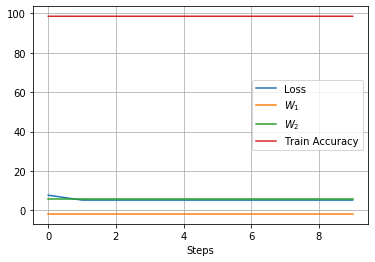

In [264]:
# Plotting steps vs loss vs weights
plt.plot(step, loss_all, label="Loss")
plt.plot(step, w1_all, label="$W_1$")
plt.plot(step, w2_all, label="$W_2$")
plt.plot(step, accuracy_all, label="Train Accuracy")
plt.xlabel("Steps")
plt.grid("on")
plt.legend()
plt.show()